In [1]:
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt

In [136]:
size = 800

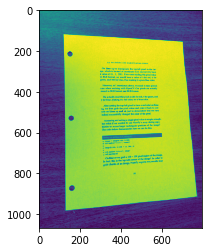

In [137]:
image = cv2.imread("images/paper.jpg")
ratio = image.shape[0] / size
rg = image.copy()
image = imutils.resize(image, width=size)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)

plt.imshow(gray)
plt.show()

In [138]:
(h, w) = image.shape[:2]

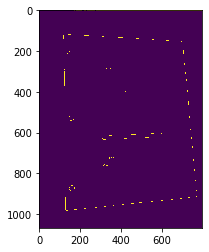

In [139]:
edged = cv2.Canny(gray, 75, 200)

plt.imshow(edged)
plt.show()

In [140]:
cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:5]

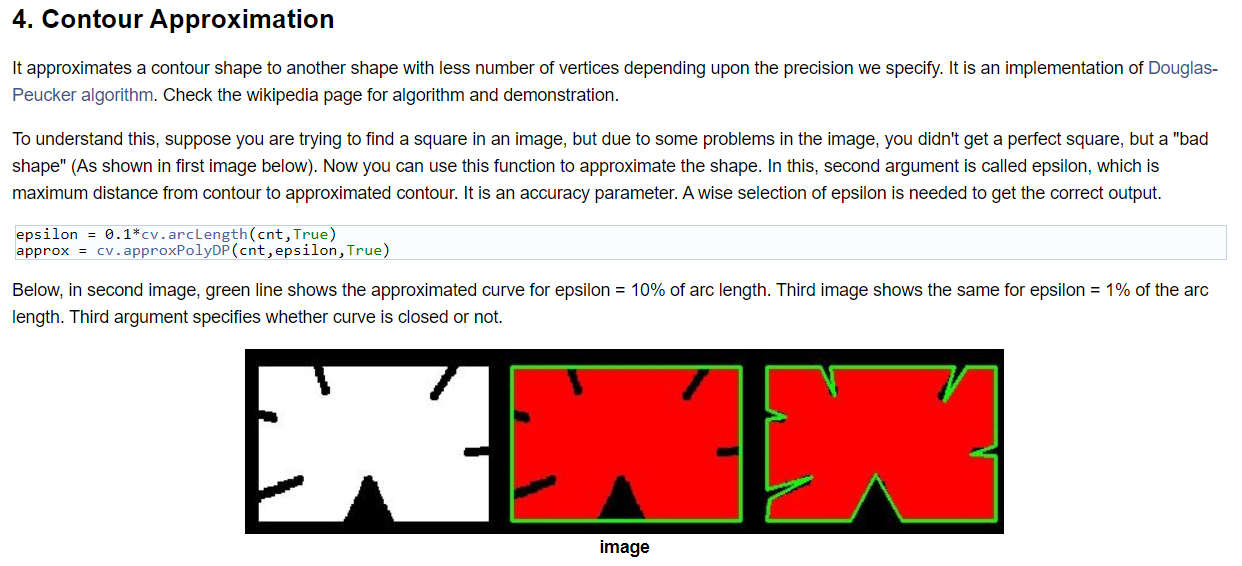

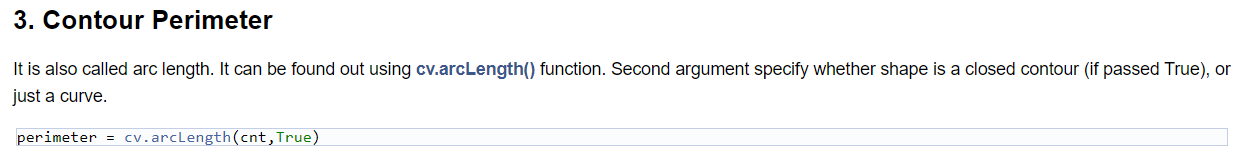

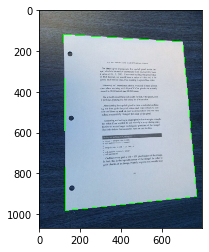

In [141]:
# po wybraniu kilku najwiekszych kontorow wybieranie tego, ktory ma 4 punkty
# then we assume that its our screen

for c in cnts:
    per = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.002*per, True)
        
    if len(approx) == 4:
        screenCnt = approx
        break
        
img = cv2.drawContours(image.copy(), [screenCnt], -1, (0, 255, 0), 2)
plt.imshow(img)
plt.show()

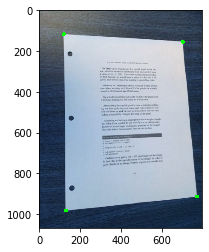

In [142]:
img2 = image.copy()

for c in screenCnt:
    cv2.drawContours(img2, [c], 0, (0, 255 ,0), 20)
    
plt.imshow(img2)
plt.show()

In [143]:
sorted_pts = np.array([screenCnt[0], screenCnt[3],screenCnt[1],screenCnt[2]]).astype(np.float32)

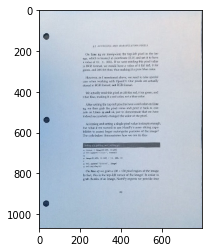

In [144]:
# points_1 = np.float32(screenCnt)
points_2 = np.float32([[0,0], [w,0], [0,h], [w,h]])

M = cv2.getPerspectiveTransform(sorted_pts, points_2)
final = cv2.warpPerspective(image, M, (w, h))

plt.imshow(final)
plt.show()

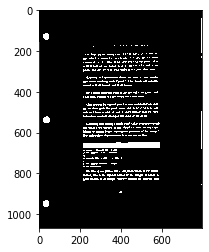

In [151]:
warp = cv2.cvtColor(final, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(warp, 175, 255, cv2.THRESH_BINARY)

cv2.imwrite('images/scanned.png', thresh)
plt.imshow(thresh, cmap="binary")
plt.show()